In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from google.colab import auth
import gspread
from google.auth import default

In [5]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)
worksheet = gc.open('Exp1').sheet1
data = worksheet.get_all_values()


In [6]:
dataset = pd.DataFrame(data[1:], columns=data[0])
dataset = dataset.astype({'Input':'float'})
dataset = dataset.astype({'Output':'float'})
dataset.head()

,Input,Output
0,1.0,9.0
1,2.0,18.0
2,3.0,27.0
3,4.0,36.0
4,5.0,45.0


In [7]:
X = dataset[['Input']].values
y = dataset[['Output']].values

In [8]:
X


array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.],
       [11.],
       [12.],
       [13.],
       [14.],
       [15.],
       [16.],
       [17.],
       [18.],
       [19.],
       [20.]])

In [9]:
X = dataset[['Input']].values
Y = dataset[['Output']].values
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.33,random_state = 20)
Scaler = MinMaxScaler()
Scaler.fit(x_train)

MinMaxScaler()

In [10]:
X_train1 = Scaler.transform(x_train)

In [11]:
brainModel = Sequential([
    Dense(units = 5, activation = 'relu' , input_shape=[1]),
    Dense(units = 6),
    Dense(units = 1)

])

In [12]:
brainModel.compile(optimizer='rmsprop',loss='mse')
brainModel.fit(x=X_train1,y=y_train,epochs=20000)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 5ms/step - loss: 0.0086
Epoch 15844/20000
1/1 [==============================] - 0s 9ms/step - loss: 0.0086
Epoch 15845/20000
1/1 [==============================] - 0s 8ms/step - loss: 0.0086
Epoch 15846/20000
1/1 [==============================] - 0s 6ms/step - loss: 0.0086
Epoch 15847/20000
1/1 [==============================] - 0s 11ms/step - loss: 0.0086
Epoch 15848/20000
1/1 [==============================] - 0s 6ms/step - loss: 0.0086
Epoch 15849/20000
1/1 [==============================] - 0s 6ms/step - loss: 0.0086
Epoch 15850/20000
1/1 [==============================] - 0s 5ms/step - loss: 0.0086
Epoch 15851/20000
1/1 [==============================] - 0s 6ms/step - loss: 0.0086
Epoch 15852/20000
1/1 [==============================] - 0s 10ms/step - loss: 0.0086
Epoch 15853/20000
1/1 [==============================] - 0s 5ms/step - loss: 0.0086
Epoch 15854/20000
1/1 [==================

In [13]:
loss_df = pd.DataFrame(brainModel.history.history)

<Axes: >

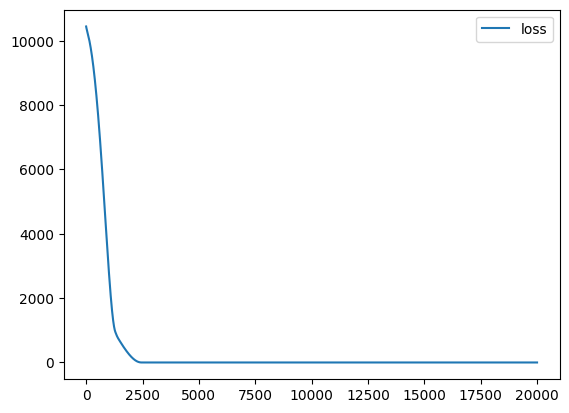

In [14]:
loss_df.plot()

In [15]:
X_test1 = Scaler.transform(x_test)

In [16]:
brainModel.evaluate(X_test1,y_test)

1/1 [==============================] - 0s 148ms/step - loss: 0.0105


0.010494197718799114

In [17]:
X_n1 = [[30]]

In [18]:
X_n1

[[30]]

In [19]:
X_n1_1 = Scaler.transform(X_n1)

In [20]:
X_n1_1

array([[1.52631579]])

In [21]:
brainModel.predict(X_n1_1)

1/1 [==============================] - 0s 81ms/step


array([[270.05225]], dtype=float32)